In [43]:
import pandas as pd
import numpy as np
import math

In [10]:
original_data=pd.read_csv("adult.csv",names =[ "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Marital Status", "Occupation", "Relationship", "Race", "Gender", "Capital Gain", "Capital Loss", "Hours per week", "country", "Target"],
                         sep=r'\s*,\s*',
                         engine='python',
                         na_values="?")
original_data.head()
#sep -- may or not have white space

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [44]:
#It provides simple and efficient tools for data mining and data analysis
#use label encoder to transform text to numbers
#LabelEncoder assigns a unique integer to each category, transforming categorical labels into integers.

import sklearn.preprocessing as preprocessing

le=preprocessing.LabelEncoder()
#fitting a transformer to the data and then transforming the data.
original_data['Occupation']=le.fit_transform(original_data['Occupation'].astype(str))
original_data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,8,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,10,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,10,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,14,Wife,Black,Female,0,0,40,Cuba,0


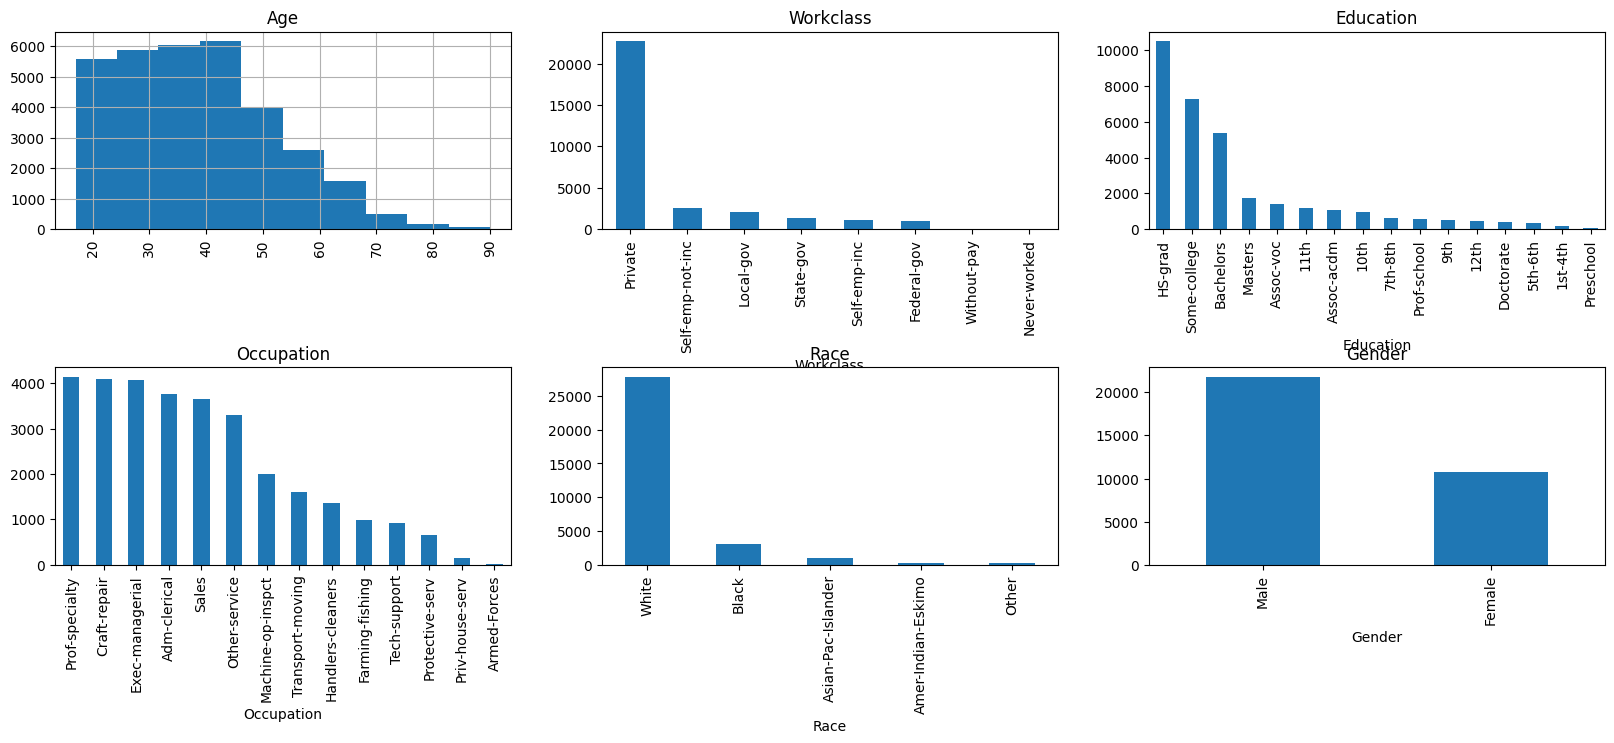

In [11]:
import matplotlib.pyplot as plt
import math
%matplotlib inline
'''
In Jupyter Notebooks, %matplotlib inline is a special command (called a "magic" command) that makes plots created with the matplotlib library appear directly in the notebook, below the code cells that produce them. This is helpful for visualizing data because it keeps the code and the resulting graphs in the same place, making it easier to analyze and interpret results.
'''

fig=plt.figure(figsize=(20,20))
cols=3
rows= math.ceil(float(original_data.shape[1])/cols)

for i, column in enumerate(['Age', 'Workclass','Education', 'Occupation', 'Race', 'Gender' ]):
    ax=fig.add_subplot(rows, cols, i+1)
    ax.set_title(column)
    if original_data.dtypes[column]== object:
        original_data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        original_data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7,wspace=0.2)
plt.show()


In [45]:
original_data['Target']=le.fit_transform(original_data['Target'].astype(str))
original_data.tail()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,4,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,11,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,0,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,0,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,8,Wife,White,Female,15024,0,40,United-States,1


In [19]:
#The tail() method in Pandas is used to display the last few rows of a DataFrame or Series. By default, tail() shows the last 5 rows

In [20]:
original_data.Target.unique()

array([0, 1])

In [21]:

#The unique() method in Pandas is used to find all unique values in a Series. When applied to a DataFrame column, it returns an array of the unique values present in that column


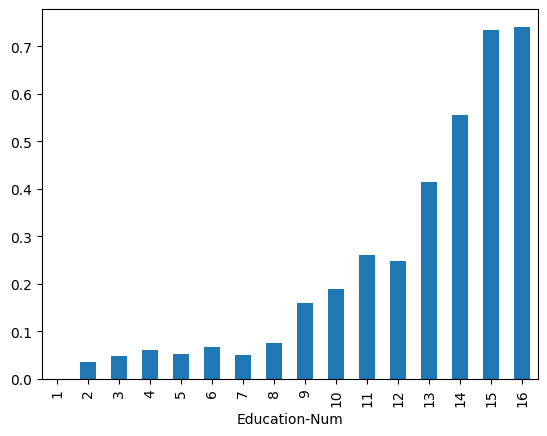

In [23]:
original_data.groupby('Education-Num').Target.mean().plot(kind='bar')
plt.show()

In [24]:
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score


In [27]:
from sklearn.model_selection import train_test_split

# Taking only the features that is important now
x=original_data[['Education-Num','Occupation']]

y=original_data['Target']

#Spliting into 80% for training set and 20% for testing set so we can see our accuracy
x_train , x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=0)

In [33]:
from sklearn.svm import SVC

#Declaring the SVC with no tuning
classifier=SVC()

#Fitting the data. This is where the SVM will learn
classifier.fit(x_train, y_train)

#predicting the result and giving the accuracy
Score =classifier.score(x_test, y_test)

print(Score)

0.7861200675571933


In [58]:
#convert potential relevant fields to have numerical values
original_data['Race']=le.fit_transform(original_data['Race'].astype(str))
original_data['Gender']=le.fit_transform(original_data['Gender'].astype(str))
original_data['Marital Status']=le.fit_transform(original_data['Marital Status'].astype(str))
original_data['Education']=le.fit_transform(original_data['Education'].astype(str))
original_data['Workclass']=le.fit_transform(original_data['Workclass'].astype(str))
original_data['Relationship']=le.fit_transform(original_data['Relationship'].astype(str))
original_data['country']=le.fit_transform(original_data['country'].astype(str))

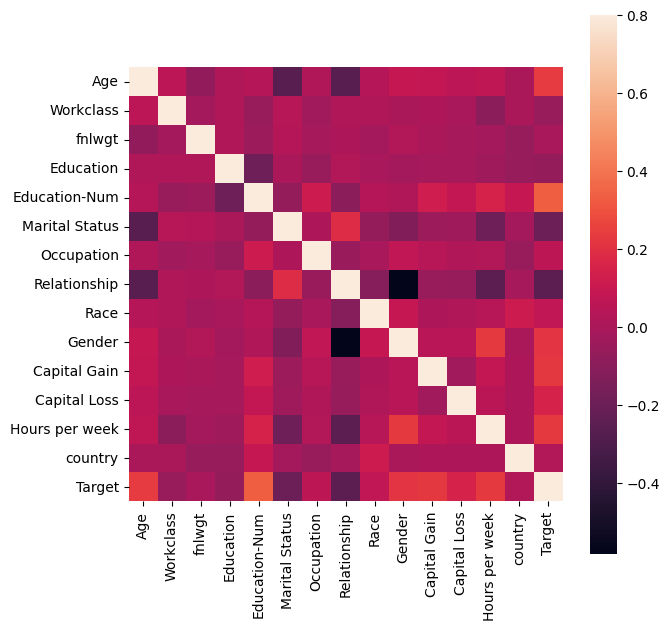

In [59]:
#correlation matrix

import seaborn as sns
corrmat=original_data.corr()
f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [60]:
'''
sns.heatmap(...): Generates the heatmap.
corrmat: The correlation matrix to visualize.
vmax=.8: Sets the maximum value for the colormap. This can be adjusted depending on the range of your correlation values.
square=True: Forces each cell in the heatmap to be square-shaped.
annot=True: Annotates each cell with the correlation value.
fmt='.2f': Formats the annotation text to two decimal places.
'''

"\nsns.heatmap(...): Generates the heatmap.\ncorrmat: The correlation matrix to visualize.\nvmax=.8: Sets the maximum value for the colormap. This can be adjusted depending on the range of your correlation values.\nsquare=True: Forces each cell in the heatmap to be square-shaped.\nannot=True: Annotates each cell with the correlation value.\nfmt='.2f': Formats the annotation text to two decimal places.\n"

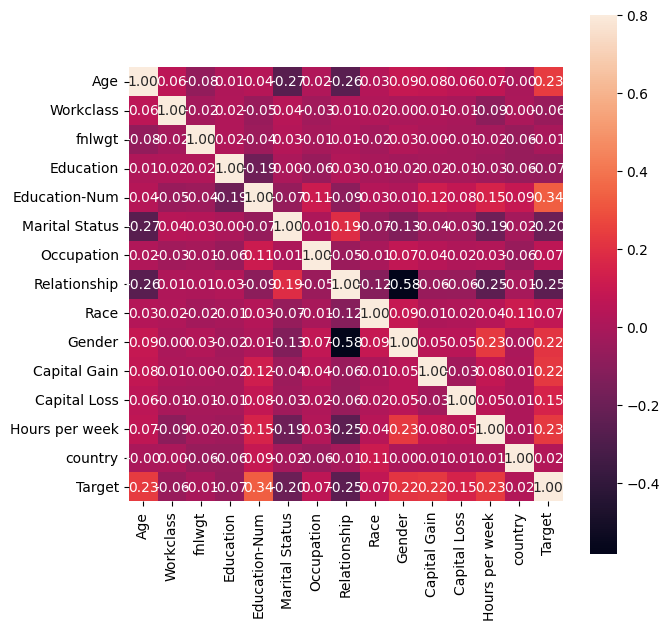

In [61]:
# To get the actual correlation values, annotate the heatmap 

f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmax=.8, square=True, annot =True, fmt='.2f')
plt.show()

In [63]:
#Resetting features
x=original_data[['Education-Num','Occupation', 'Age','Gender']]
y=original_data['Target']

#Splitting training and test data
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
classifier=SVC()

classifier.fit(x_train, y_train)

score= classifier.score(x_test, y_test)
print(score)

0.7933364041148472


In [64]:
#Setting our kernel to radial Basis Function with penalty parameter c=1.0
classifier =SVC(kernel='rbf',C=1.0)
classifier.fit(x_train, y_train)

score=classifier.score(x_test, y_test)
print(score)
# kernel ='rbf' and C=1.0 are the default values

0.7933364041148472


In [66]:
'''
kernel='rbf':

The kernel parameter specifies the type of kernel function to be used in the classifier. In this case, 'rbf' stands for Radial Basis Function, which is a popular choice. The RBF kernel, also known as the Gaussian kernel, is effective in handling non-linear relationships in the data by mapping the features into a higher-dimensional space where a linear separation might be possible.
C=1.0:

The C parameter is a regularization parameter. It controls the trade-off between achieving a low error on the training data and minimizing the complexity of the model. A smaller C value encourages a larger margin between classes but can allow more misclassifications, while a larger C value aims to classify all training examples correctly by giving the model more flexibility, but it may lead to overfitting. Setting C=1.0 is a common default choice, indicating a balanced approach between margin size and classification accuracy.
'''

"\nkernel='rbf':\n\nThe kernel parameter specifies the type of kernel function to be used in the classifier. In this case, 'rbf' stands for Radial Basis Function, which is a popular choice. The RBF kernel, also known as the Gaussian kernel, is effective in handling non-linear relationships in the data by mapping the features into a higher-dimensional space where a linear separation might be possible.\nC=1.0:\n\nThe C parameter is a regularization parameter. It controls the trade-off between achieving a low error on the training data and minimizing the complexity of the model. A smaller C value encourages a larger margin between classes but can allow more misclassifications, while a larger C value aims to classify all training examples correctly by giving the model more flexibility, but it may lead to overfitting. Setting C=1.0 is a common default choice, indicating a balanced approach between margin size and classification accuracy.\n"

In [68]:
#Setting our kernel to radial Basis Function with penalty parameter c=1.0
#Hyperparameter Tuning
classifier =SVC(kernel='rbf',C=10)
classifier.fit(x_train, y_train)

score=classifier.score(x_test, y_test)
print(score)
# kernel ='rbf' and C=1.0 are the default values


0.7976354982343006


In [70]:
#Let us now try a linear kernel
classifier =SVC(kernel='linear',C=1.0)
classifier.fit(x_train, y_train)

score=classifier.score(x_test, y_test)
print(score)
# kernel ='rbf' and C=1.0 are the default values

0.7977890373099954
